In [1]:
import tensorflow as tf
import numpy as np

C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [132]:
import cv2
from time import time

In [2]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [169]:
junk_train = np.random.rand(6000,28,28)
junk_test = np.random.rand(1000,28,28)
y_junk_train = np.ones((6000))*10
y_jun_test = np.ones((1000))*10

In [170]:
x_train = np.concatenate((x_train, junk_train),axis=0)
y_test = np.concatenate((y_test, y_junk_test),axis=0)
x_test = np.concatenate((x_test, junk_test),axis=0)
y_train = np.concatenate((y_train, y_junk_train),axis=0)

In [172]:
y_test[y_test == 10].shape

(1000,)

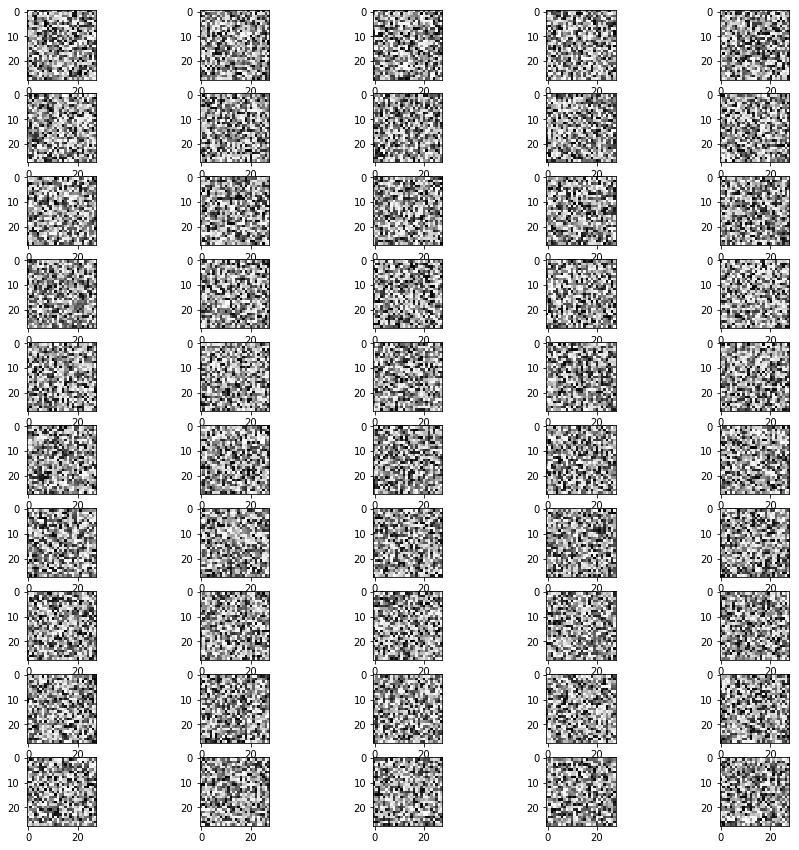

In [173]:
ones = x_train[y_train == 10]
plt.figure(figsize = (15,15))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(ones[i], cmap = 'Greys')
plt.show()

In [175]:
#Simple single hidden-layer Dense Network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
66000/66000 [==============================] - 24s 368us/step - loss: 0.1980 - acc: 0.9403

[0.05678804171319412, 0.982909090909091]

In [180]:
import matplotlib.image as mpi
nums_page_high = mpi.imread('Numbers Page High Quality.jpg')
big_1_hq = nums_page_high[850:1300,600:900,:]
big_2_hq = nums_page_high[850:1300,1000:1350,:]
big_3_hq = nums_page_high[850:1300,1400:1750,:]
big_4_hq = nums_page_high[850:1300,1800:2150,:]
big_5_hq = nums_page_high[850:1300,2200:2600,:]
big_6_hq = nums_page_high[850:1300,2750:3100,:]
junk_hq = nums_page_high[1200:1300,2950:3100,:]
nums_page_med = mpi.imread('Numbers Page Med Quality.jpg')
big_1_mq = nums_page_med[275:450,175:300,:]
big_2_mq = nums_page_med[275:450,325:450,:]
nums_page_low = mpi.imread('Numbers Page Low Quality.jpg')
big_1_lq = nums_page_low[100:160,65:120,:]
big_2_lq = nums_page_low[100:160,115:175,:]

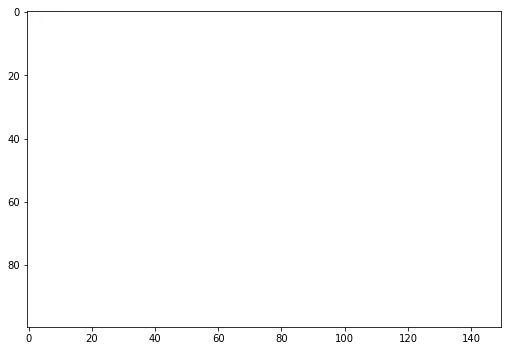

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8.5,11))
plt.imshow(nums_page_high[1200:1300,2950:3100,:])
plt.show()

In [136]:
def grey2black(img, thresh = 0.1):
    '''
    takes a numpy grayscale image as input (2 dimensions only)
    returns the image with any cell with value > threshold set to 1
    
    expects that the image is mostly whitespace. 
    if the image is more than half black, it flips white/black
    '''
    import numpy as np
    if not isinstance(img, np.ndarray):
        raise TypeError('Input Image must be numpy array')
    if len(img.shape) > 2:
        raise TypeError('Input Image must only have 2 dimensions')
        
    if np.mean(img) >= 0.5:
        img = 1-img
        print('Flipping Black/White of this image')
        
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if img[row,col] > thresh:
                img[row,col] = 1
            else:
                img[row,col] = 0
    return img


def NN_predict(img, return_img = False):
    '''
    Takes in an image, formats it, and gives the NN digit prediction
    '''
    from skimage.transform import resize
    from skimage.color import rgb2grey #note- rgb2grey calculates illuminance (so full white is == 1)
    import matplotlib.pyplot as plt
    import cv2
    
    kernel = np.ones((4,4), np.uint8) 
    img = cv2.erode(img, kernel, iterations=4) 
    img_bw = grey2black(resize(grey2black(rgb2grey(img)),(28,28)))
    
    prediction = model.predict(img_bw.reshape(1,28,28))[0]
    
    digit = prediction.argmax()
    probability = prediction[digit]
    if not return_img:
        return digit, probability
    else:
        return digit, probability, img_bw

def plot_predict(img):
    '''
    Takes in an image, and plots it along with the NN digit prediction
    '''
    from skimage.transform import resize
    from skimage.color import rgb2grey #note- rgb2grey calculates illuminance (so full white is == 1)
    import matplotlib.pyplot as plt
    import cv2
    
    digit, probability, img_bw = NN_predict(img, True)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img, cmap = 'Greys')
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(img_bw, cmap = 'Greys')
    plt.title('Reduced, GrayScale')
    plt.suptitle("Predicted to be a {:d} with probability: {:.2f}".format(digit, probability))
    plt.show()

Flipping Black/White of this image


C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


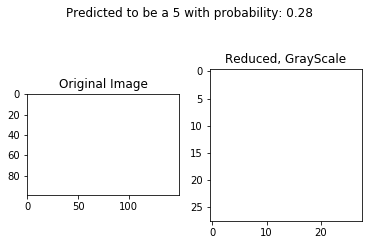

In [181]:
plot_predict(junk_hq)

In [135]:
start = time()
NN_predict(big_4_hq)
print(time() - start)

Flipping Black/White of this image
0.08984947204589844


C:\Users\raymo\Anaconda2\envs\py36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


# Moving Forward

Clearly there are some problems with just using the raw image with no feature extraction and a simple dense NN. Possible ways to improve:
- Resizing procedure! Clearly not working
- expansion on the image- thickening the text
- Convolutional NN
- Feature Extraction (such as HOG)

# Playing around with HOG

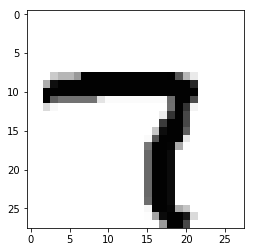

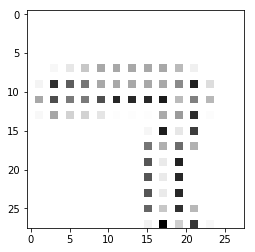

In [10]:
import matplotlib.pyplot as plt
img = x_train[23000]
plt.imshow(img, cmap = 'Greys')
plt.show()

from skimage.morphology import skeletonize, medial_axis
from skimage.feature import hog
from skimage import exposure

#skele= skeletonize(img)
#med = medial_axis(img)
fv, hog = hog(img,feature_vector= False, visualise = True,
             pixels_per_cell = (2,2), cells_per_block = (3,3), block_norm = 'L2-Hys')

#plt.imshow(skele, cmap = 'Greys')
#plt.show()
#plt.imshow(med, cmap = 'Greys')
#plt.show()
plt.imshow(hog, cmap = 'Greys')
plt.show()

In [11]:
from time import time
from skimage.feature import hog as hist_grad
start = time()
x_train_processed = []
for i in range(100):
    img = x_train[i]
    fv, hog = hist_grad(img, feature_vector= False, visualise = True, pixels_per_cell = (2,2), cells_per_block = (3,3), block_norm = 'L2-Hys')
    x_train_processed.append(hog)

x_train_processed = np.array(x_train_processed)
duration = time() - start
print(duration)

4.144976377487183
